# Сборный проект-2


ОПИСАНИЕ ПРОЕКТА

Вы работаете в стартапе, который продаёт продукты питания. 

ЦЕЛЬ: Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
Изучить воронку продаж. Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
Исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выяснить, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

ОПИСАНИЕ ДАННЫХ:
Каждая запись в логе — это действие пользователя, или событие. 
EventName — название события;
DeviceIDHash — уникальный идентификатор пользователя;
EventTimestamp — время события;
ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

ПЛАН:
1. Изучить данные (Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/logs_exp.csv. Скачать датасет)
2. Предобработка данных
Замените названия столбцов на удобные для вас;
Проверьте пропуски и типы данных. Откорректируйте, если нужно;
Добавьте столбец даты и времени, а также отдельный столбец дат;
3. Исследовательский анализ данных 
Изучите и проверьте данные:
Сколько всего событий в логе?
Сколько всего пользователей в логе?
Сколько в среднем событий приходится на пользователя?
Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
Много ли событий и пользователей вы потеряли, отбросив старые данные?
Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.
4. Изучить воронку событий
Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
На каком шаге теряете больше всего пользователей?
Какая доля пользователей доходит от первого события до оплаты?
5. Изучить результаты эксперимента
Сколько пользователей в каждой экспериментальной группе?
Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.


## Изучение данных

(Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/logs_exp.csv. Скачать датасет)

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
from scipy import stats as st
import math as mth

In [2]:
#откроем файл с данными
data=pd.read_csv('/datasets/logs_exp.csv',sep='\t')

In [3]:
#Изучим данные
pd.set_option('display.max_columns', None)
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


В таблице 4 столбца, 244126 строк. Названия столбцов необходимо привести к нижнему регистру.

Типы данных:
- целочисленный (int)-DeviceIDHash,EventTimestamp,ExpId.
- строки object(3)-EventName.

Нужно заменить типы следующих столбцов:EventTimestamp-на дату .
Пропусков в столбцах нет.

## Предобработка данных

Замените названия столбцов на удобные для вас;
Проверьте пропуски и типы данных. Откорректируйте, если нужно;
Добавьте столбец даты и времени, а также отдельный столбец дат;

In [5]:
#переведем столбец EventTimestamp в тип даты и времени
data['EventTimestamp']=pd.to_datetime(data['EventTimestamp'],unit='s')

In [6]:
#Переименуем столбцы
data=data.rename(columns={
    'EventName': 'eventname',
    'DeviceIDHash': 'userid',
    'EventTimestamp': 'eventtime',
    'ExpId': 'expid'})
data.columns


Index(['eventname', 'userid', 'eventtime', 'expid'], dtype='object')

In [7]:
#проверим данные на явные дубликаты
data.duplicated().sum()

413

In [8]:
#посмотрим долю дубликатов
data.duplicated().sum()*100/len(data)

0.16917493425526162

In [9]:
#удалим явные дубликаты
data = data.drop_duplicates()

In [10]:
#добавим столбец с датой
data['date']=pd.DatetimeIndex(data['eventtime']).date


In [11]:
data.head()

,eventname,userid,eventtime,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Промежуточный вывод:
    1. Заменены названия столбцов на
'eventname' (название события), 'userid' (уникальный идентификатор пользователя), 'eventtime'(время события), 'expid'(номер эксперимента)
    2. Cтолбец EventTimestamp переведен в тип даты и времени+ добавлен столбец с датой 'date'
    3. Обнаружены и удалены 413 явных дубликата(это 0,17% от всех данных).


## Исследовательский анализ данных 

Изучите и проверьте данные:
Сколько всего событий в логе?
Сколько всего пользователей в логе?
Сколько в среднем событий приходится на пользователя?
Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
Много ли событий и пользователей вы потеряли, отбросив старые данные?
Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [12]:
#Сколько всего событий в логе
data['eventname'].count()

243713

In [13]:
#Сколько всего пользователей в логе
len(data['userid'].unique())

7551

Определим сколько в среднем событий приходится на пользователя

In [14]:


data.groupby('userid')['eventname'].count().median()

20.0

Определим минимальную и максимальную даты 

In [15]:

min_date = data['date'].min()

min_date

datetime.date(2019, 7, 25)

In [16]:
max_date = data['date'].max()  
max_date

datetime.date(2019, 8, 7)

Получился период с 25 июля по 7 августа 2019 года

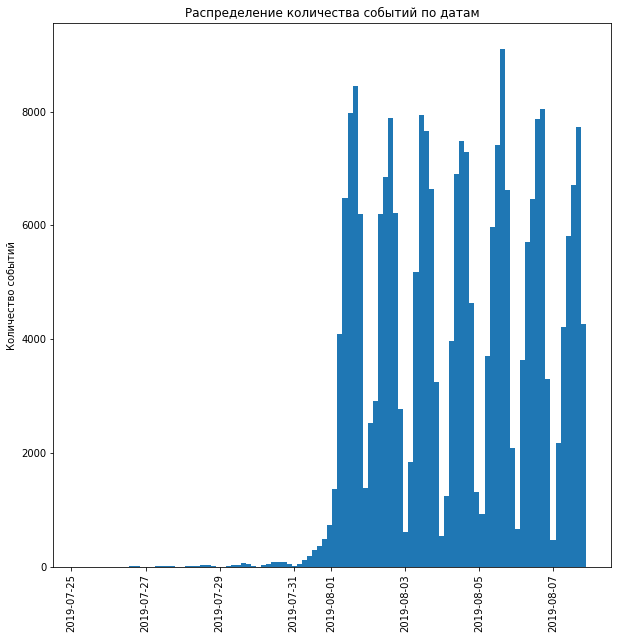

In [17]:
#Построим гистограмму по дате и времени. 
plt.figure(figsize=(10, 10))
plt.hist(data['eventtime'], bins=100)
plt.xticks(rotation=90)
plt.title('Распределение количества событий по датам')
plt.ylabel('Количество событий')
plt.show()



<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:  Спасибо, исправила </b>
</div>

Промежуточный вывод:
Перед нами логи за период с 25 июля по 7 августа 2019 года.
Всего событий 243713. 
Пользователей 7551. 
В среднем на одного пользователя - 20 событий.
По гистограмме видно, что полные данные начинаются с 01.08.2019.

In [18]:
#сделаем срез данных за период с 1.08-7.08
data_new=data.query('eventtime >= "2019-08-01"')
#посмотрим сколько данных удалено
display(len(data)-len(data_new))
#посмотрим сколько данных осталось
display(len(data_new))

#посчитаем долю удаленных данных
print((len(data)-len(data_new))*100/len(data))

2826

240887

1.1595606307418973


In [19]:
#посмотрим сколько пользователей осталось в актуальном периоде
len(data_new['userid'].unique())

7534

In [20]:
#всего пользователей было 
len(data['userid'].unique())

7551

In [21]:
#найдем долю удаленных пользователей
(len(data['userid'].unique())-len(data_new['userid'].unique()))*100/len(data['userid'].unique())

0.22513574361011787

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [22]:
data_group = data_new.pivot_table(index=['expid'], values='userid',aggfunc='count')
data_group

,userid
expid,
246,79302
247,77022
248,84563


In [23]:
#событий в среднем на 1 пользователя


data_new.groupby('userid')['eventname'].count().median()

19.0

Промежуточный вывод:
Для дальнейшего анализа берем данные за период с 1.08-7.08.
Отбросив данные более раннего периода мы теряем 1% данных.
Событий в логе за этот период 240887.
Пользователей в логе за этот период 7534.
Пользователи есть во всех трёх экспериментальных группах.
На 1 пользователя в среднем 19 событий.


## Изучение воронки событий

Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

,userid
eventname,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


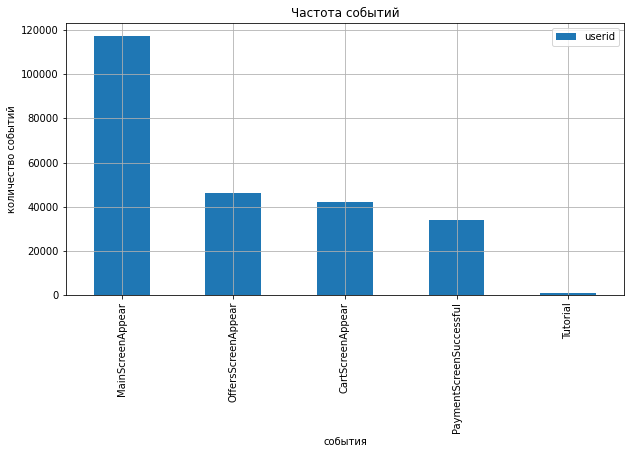

In [24]:
data_r = data_new.pivot_table(index=['eventname'], values='userid',aggfunc='count')
data_r.sort_values(by='userid', ascending=False).plot(grid=True, kind='bar', figsize=(10, 5));


data_r.sort_values(by='userid', ascending=False)
plt.title('Частота событий')
plt.xlabel('события')
plt.ylabel('количество событий')


data_r.sort_values(by='userid', ascending=False)

Чаще всего встречается событие MainScreenAppear случалось 117328 раз, самое редкое событие Tutorial-1005раз.

Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

In [25]:
users = data_new.groupby('eventname')['userid'].agg('nunique').reset_index()
users['part']=users['userid']/data_new['userid'].nunique()

users.sort_values(by='userid', ascending=False)

,eventname,userid,part
1,MainScreenAppear,7419,0.984736
2,OffersScreenAppear,4593,0.609636
0,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


Предположим, в каком порядке происходят события.

1	MainScreenAppear	Появление главного экрана
2	OffersScreenAppear	Появление предложений на экране
3	CartScreenAppear	Появление экрана корзины
4	PaymentScreenSuccessful	Экран успешной оплаты
5  Tutorial
Первые четыре события образуют логичную цепочку пользователя по шагам в приложении. Tutorial-руководство проходят очень мало пользователей.
Наверно не является обязательным этапом прохождения. Поэтому можно не включать в воронку продаж

Промежуточный вывод: 98% пользователей хотя бы раз открыли главный экран, 
    61% хотя бы раз дошли до экрана предложений, около 50% -до корзины, 47% - до успешной оплаты, 11% хотябы раз посмотрели руководство.

Построим воронку и посмотрим какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)

In [ ]:
 fig = go.Figure(go.Funnel(
    y = ["MainScreenAppear-главный экран", "OffersScreenAppear-товары", "CartScreenAppear-корзина", "PaymentScreenSuccessful-оплата"],
    x = [7419, 4593, 3734, 3539],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65))
fig.update_layout(title="Доля пользователей, которая проходит на следующий шаг воронки")
fig.show()

Промежуточный вывод:
С главного экрана на страницу товаров проходит 62% пользователей, со страницы товаров в корзину переходит 50% пользователей, из корзины к оплате переходит 48% пользователей.

Больше всего пользователей теряется на первом шаге (38%). Почему то пользователи не попадают на экран с товарами. Возможно пересмотреть навигацию(меню) на главном экране, или сообщить тех.специалистам, если не все пользователи могут попасть в каталог товаров.
Только 48% пользователей доходит от первого события до оплаты.

## Изучение результатов эксперимента

Сколько пользователей в каждой экспериментальной группе?
Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.


Посмотрим сколько пользователей в каждой экспериментальной группе

In [ ]:
users_group = data_new.groupby('expid')['userid'].agg('nunique').reset_index()

users_group.sort_values(by='userid', ascending=False)

Количество пользователей в группах почти одинаковое (разница 1-2%).
Количество пользователей в каждой из групп достаточно большое для проведения исследования и разница между размерами групп незначительная


246 и 247 — контрольные группы, а 248 — экспериментальная.

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. 
Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

Выберем самое популярное событие 'MainScreenAppear'. Посчитаем число пользователей,
совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие.

In [ ]:
group_msa = data_new.query('eventname == "MainScreenAppear" and expid!=248')

users_msa = group_msa.groupby('expid')['userid'].agg('nunique').reset_index().sort_values(by='userid', ascending=False)


users_msa['part']=users_msa['userid']/users_group['userid']
users_msa


In [ ]:
#Сделаем общую таблицу с числом уникальных пользователей по каждому событию и группе

msa = data_new.pivot_table(index='eventname', columns= 'expid', values = 'userid',aggfunc = {'userid':'nunique'}).reset_index()
#.drop(index='Tutorial')
msa

Проверим, будет ли отличие между группами статистически достоверным. 

гипотеза Н0: равные доли в обеих группах 
гипотеза Н1: доли выборках не равны

In [ ]:
trials = np.array([users_group.loc[0,'userid'], 
                  users_group.loc[1,'userid']])
trials


In [ ]:
successes=np.array([msa.loc[1,246], 
                  msa.loc[1,247]])
successes

In [ ]:

alpha = .05 # критический уровень статистической значимости
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2 
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [ ]:
#напишем функцию для проверки гипотез и проверим по всем событиям

def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):


    # число пользователей в группе 1 и группе 2:
    
    trials = np.array([trials1,trials2]) 
         
    # число пользователей, совершивших событие в группе 1 и группе 2
    successes = np.array([successes1, successes2]) 
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    # разница пропорций в датасетах
    difference = p1 - p2
 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
    
    distr = st.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    
    print(event)
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        print('')
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')

 Проверим, будет ли отличие между группами статистически достоверным и для других событий
сформируем гипотезы:
гипотеза Н0: равные доли в обеих группах 
гипотеза Н1: доли выборках не равны

In [ ]:
for event in ['MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful']:
    successes1=msa[msa['eventname']==event][246]
    successes2=msa[msa['eventname']==event][247]
    check_hypothesis(successes1, successes2,  users_group.loc[0,'userid'], users_group.loc[1,'userid'], alpha=0.05)

Сделав А-А  тестирование 2 экспериментальных групп 246 и 247 было выяснено:

Статистически значимой разницы между долями для всех событий двух экспериментальных групп не обнаружено. Данное явление характерно для всех событий в обоих группах.

Можно сказать, что разбиение на группы работает корректно.


Аналогично поступим с группой 248 с изменённым шрифтом. 
Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. 
А/Б тест
Н0: Доли контрольной групы 246 и 248 не отличаются друг от друга
Н1: Доли контрольной групы 246 и 248 групп отличаются друг от друга


Сравним группы 246 и 248

In [ ]:
for event in ['MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful']:
    successes1=msa[msa['eventname']==event][246]
    successes2=msa[msa['eventname']==event][248]
    check_hypothesis(successes1, successes2,  users_group.loc[0,'userid'], users_group.loc[2,'userid'], alpha=0.05)

сравним группы 247 и 248

Сформулируем гипотезы:
Н0: Доли контрольной групы 247 и 248 не отличаются друг от друга Н1: Доли контрольной групы 247 и 248 групп отличаются друг от друга

In [ ]:
for event in ['MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful']:
    successes1=msa[msa['eventname']==event][247]
    successes2=msa[msa['eventname']==event][248]
    check_hypothesis(successes1, successes2,  users_group.loc[1,'userid'], users_group.loc[2,'userid'], alpha=0.05)

сравним группы объединенную экспериментальную группу(246+247) и 248

Сформулируем гипотезы: 
Н0: Доли объединенной экспериментальной группы (246+247) и 248 не отличаются друг от друга Н1: Доли объединенной экспериментальной групы (246+247) и 248 групп отличаются друг от друга

In [ ]:
#добавим столбец 246+247
msa['246+247']=msa[246]+msa[247]

In [ ]:
count=users_group.query('expid!=248')
count.sum()

In [ ]:
for event in ['MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful']:
    successes1=msa[msa['eventname']==event]['246+247']
    successes2=msa[msa['eventname']==event][248]
    check_hypothesis(successes1, successes2, 4997, users_group.loc[2,'userid'], alpha=0.05)

Сделано 20 проверок статистических гипотез (4 проверки для 5 этапов). 
Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, можно скорректировать значение требуемого уровня значимости по методу Шидака

In [ ]:
# Скорректированное значение требуемого уровня значимости по методу Шидака рассчитывается по формуле: 

alfa=1 - (1 - 0.05)**(1/20)
alfa


 Так как для всех событий и групп p-value больше 0.05(а с поправкой соответственно гораздо больше 0.0026), min p-значение:  [0.07842923].Поэтому, не получилось отвергнуть нулевую гипотезу. 
 

Можно сделать вывод, что изменение шрифта не повлияло на поведение пользователей в приложении.

Вывод: Перед нами логи за период с 25 июля по 7 августа 2019 года. Всего событий 243713. Пользователей 7551. В среднем на одного пользователя - 20 событий. По гистограмме видно, что полные данные начинаются с 01.08.2019.
Для дальнейшего анализ берем данные за период с 1.08-7.08.
Отбросив данные более раннего периода мы теряем 1% данных.
Событий в логе за этот период 240887.
Пользователей в логе за этот период 7534.
Пользователи есть во всех трёх экспериментальных группах.
На 1 пользователя в среднем 19 событий. 
Событийный анализ позволил определить следующие особенности в поведении пользователей: 
Чаще всего встречается событие MainScreenAppear случалось 117328 раз, самое редкое событие Tutorial-1005раз. Получилась следующая воронка:
1 MainScreenAppear Появление главного экрана 
2 OffersScreenAppear Появление предложений на экране
3 CartScreenAppear Появление экрана корзины 
4 PaymentScreenSuccessful Экран успешной оплаты
5 Tutorial
Первые четыре события образуют логичную цепочку пользователя по шагам в приложении. 
Tutorial-руководство проходят очень мало пользователей. Наверно не является обязательным этапом прохождения.
Если рассмотреть в процентном соотношении переход пользователей на каждый этап воронки, можно увидеть следующую картину:
    98% пользователей хотя бы раз открыли главный экран, 
    61% хотя бы раз дошли до экрана предложений, 
    около 50% -до корзины, 
    47% - до успешной оплаты,
    11% хотябы раз посмотрели руководство.
Больше всего пользователей теряется на первом шаге (38%). Почему то пользователи не попадают на экран с товарами. Только 48% пользователей доходит от первого события до оплаты.
Можно сделать вывод, что изменение шрифта не повлияло на поведение пользователей в приложении.На основе A/A/B-эксперимента было выявлено, что изменение шрифта не повлияло на поведение пользователей в приложении.

<div style="border:solid Chocolate 2px; padding: 40px">



<div class="alert alert-success">


    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

   

